In [ ]:
Oil Price forcasting

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline

# Read Dataset

In [2]:
data = pd.read_excel("RBRTE Data.xlsx")

In [3]:
data.head(10)

Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
5 1987-05-27  18.60
6 1987-05-28  18.60
7 1987-05-29  18.58
8 1987-06-01  18.65
9 1987-06-02  18.68

# Data Pre-processing

In [ ]:
Observing above,  dataset is missing saturday and sunday value at index 2 & 3 also at index 7& 8.

In [4]:
data

Date   Price
0    1987-05-20   18.63
1    1987-05-21   18.45
2    1987-05-22   18.55
3    1987-05-25   18.60
4    1987-05-26   18.63
...         ...     ...
8906 2022-06-21  118.51
8907 2022-06-22  115.54
8908 2022-06-23  114.50
8909 2022-06-24  117.36
8910 2022-06-27  119.69

[8911 rows x 2 columns]

In [5]:
data.shape

(8911, 2)

In [6]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [7]:
data.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [8]:
data1=data.copy()

In [9]:
data1

Date   Price
0    1987-05-20   18.63
1    1987-05-21   18.45
2    1987-05-22   18.55
3    1987-05-25   18.60
4    1987-05-26   18.63
...         ...     ...
8906 2022-06-21  118.51
8907 2022-06-22  115.54
8908 2022-06-23  114.50
8909 2022-06-24  117.36
8910 2022-06-27  119.69

[8911 rows x 2 columns]

In [10]:
data1.head()

Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

In [11]:
data1.set_index('Date', inplace=True)

In [12]:
data1.head()

Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63

In [13]:
#Resample values of saturday and sunday with prvious day price
data2 = data1.resample('D').ffill().reset_index()

In [ ]:
# resampling is done daywise. Here upsampling means adding missing day values is done.

In [14]:
data2.head(10)

Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-23  18.55
4 1987-05-24  18.55
5 1987-05-25  18.60
6 1987-05-26  18.63
7 1987-05-27  18.60
8 1987-05-28  18.60
9 1987-05-29  18.58

In [15]:
data2.isnull().sum()

Date     0
Price    0
dtype: int64

In [16]:
data2.describe()

Price
count  12823.000000
mean      47.971713
std       32.716123
min        9.100000
25%       19.000000
50%       37.150000
75%       69.360000
max      143.950000

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12823 non-null  datetime64[ns]
 1   Price   12823 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 200.5 KB


In [18]:
#Due to resampling values for saturday and sunday is added in the data2 dataset. Originally it was 8911 rows × 2 columns for data1

data2.shape

(12823, 2)

# EDA

In [19]:
data2_backup=data2.copy()
data2_backup.head(10)
#data2_backup.shape

Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-23  18.55
4 1987-05-24  18.55
5 1987-05-25  18.60
6 1987-05-26  18.63
7 1987-05-27  18.60
8 1987-05-28  18.60
9 1987-05-29  18.58

In [20]:
data2_backup.shape

(12823, 2)

In [21]:
data2['Year']=data2['Date'].dt.year
data2['Month']=data2['Date'].dt.month
data2['Week']=data2['Date'].dt.week

C:\Users\Anuja\AppData\Local\Temp/ipykernel_5768/587004992.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data2['Week']=data2['Date'].dt.week


In [22]:
data2.head(30)

Date  Price  Year  Month  Week
0  1987-05-20  18.63  1987      5    21
1  1987-05-21  18.45  1987      5    21
2  1987-05-22  18.55  1987      5    21
3  1987-05-23  18.55  1987      5    21
4  1987-05-24  18.55  1987      5    21
5  1987-05-25  18.60  1987      5    22
6  1987-05-26  18.63  1987      5    22
7  1987-05-27  18.60  1987      5    22
8  1987-05-28  18.60  1987      5    22
9  1987-05-29  18.58  1987      5    22
10 1987-05-30  18.58  1987      5    22
11 1987-05-31  18.58  1987      5    22
12 1987-06-01  18.65  1987      6    23
13 1987-06-02  18.68  1987      6    23
14 1987-06-03  18.75  1987      6    23
15 1987-06-04  18.78  1987      6    23
16 1987-06-05  18.65  1987      6    23
17 1987-06-06  18.65  1987      6    23
18 1987-06-07  18.65  1987      6    23
19 1987-06-08  18.75  1987      6    24
20 1987-06-09  18.78  1987      6    24
21 1987-06-10  18.78  1987      6    24
22 1987-06-11  18.68  1987      6    24
23 1987-06-12  18.78  1987      6    24
24 1987-06-13  18.78  1987      6    24
25 1987-06-14  18.78  1987      6    24
26 1987-06-15  18.78  1987      6    25
27 1987-06-16  18.90  1987      6    25
28 1987-06-17  19.03  1987      6    25
29 1987-06-18  19.05  1987      6    25

In [23]:
data2.tail(30)

Date   Price  Year  Month  Week
12793 2022-05-29  121.19  2022      5    21
12794 2022-05-30  123.01  2022      5    22
12795 2022-05-31  125.53  2022      5    22
12796 2022-06-01  122.20  2022      6    22
12797 2022-06-02  122.20  2022      6    22
12798 2022-06-03  125.68  2022      6    22
12799 2022-06-04  125.68  2022      6    22
12800 2022-06-05  125.68  2022      6    22
12801 2022-06-06  124.99  2022      6    23
12802 2022-06-07  126.89  2022      6    23
12803 2022-06-08  129.20  2022      6    23
12804 2022-06-09  128.47  2022      6    23
12805 2022-06-10  127.44  2022      6    23
12806 2022-06-11  127.44  2022      6    23
12807 2022-06-12  127.44  2022      6    23
12808 2022-06-13  128.44  2022      6    24
12809 2022-06-14  127.02  2022      6    24
12810 2022-06-15  124.96  2022      6    24
12811 2022-06-16  125.78  2022      6    24
12812 2022-06-17  119.22  2022      6    24
12813 2022-06-18  119.22  2022      6    24
12814 2022-06-19  119.22  2022      6    24
12815 2022-06-20  118.25  2022      6    25
12816 2022-06-21  118.51  2022      6    25
12817 2022-06-22  115.54  2022      6    25
12818 2022-06-23  114.50  2022      6    25
12819 2022-06-24  117.36  2022      6    25
12820 2022-06-25  117.36  2022      6    25
12821 2022-06-26  117.36  2022      6    25
12822 2022-06-27  119.69  2022      6    26

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12823 entries, 0 to 12822
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12823 non-null  datetime64[ns]
 1   Price   12823 non-null  float64       
 2   Year    12823 non-null  int64         
 3   Month   12823 non-null  int64         
 4   Week    12823 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 501.0 KB


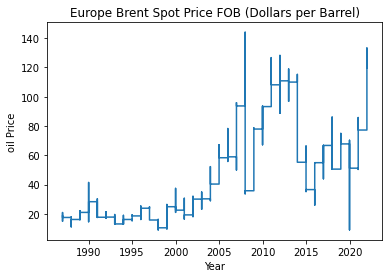

In [25]:
plt.plot(data2.Year, data2.Price)
plt.xlabel("Year")  # add X-axis label
plt.ylabel("oil Price")  # add Y-axis label
plt.title("Europe Brent Spot Price FOB (Dollars per Barrel)")  # add title
plt.show()

C:\Users\Anuja\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:title={'center':'Europe Brent Spot Price FOB (Dollars per Barrel)'}, xlabel='Year', ylabel='Price'>

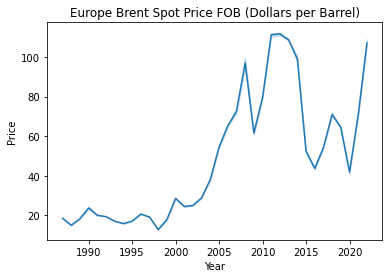

In [26]:
import seaborn as sns
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Europe Brent Spot Price FOB (Dollars per Barrel)")  # add title
sns.lineplot(x='Year',y='Price',data = data2)

<AxesSubplot:ylabel='Crude Oil Prices: Brent - Europe'>

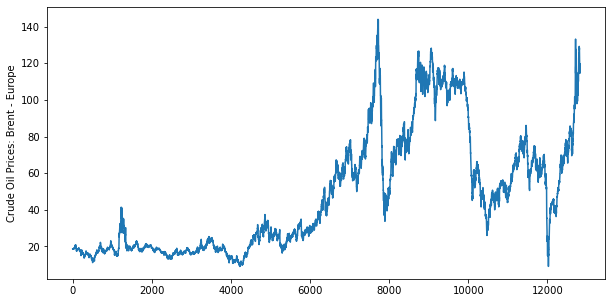

In [27]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data2.Price.plot(figsize=(10,5))

In [28]:
data2.Year.unique()

array([1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

(array([6012., 1848., 2501.,  865., 1403.,  194.]),
 array([  9.1  ,  31.575,  54.05 ,  76.525,  99.   , 121.475, 143.95 ]),
 <BarContainer object of 6 artists>)

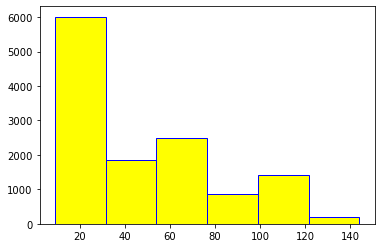

In [29]:
plt.hist(data2['Price'],facecolor ="yellow",edgecolor ="blue",bins =6)

(array([4434., 1921., 1113., 1420., 1473.,  602.,  438., 1112.,  268.,
          42.]),
 array([  9.1  ,  22.585,  36.07 ,  49.555,  63.04 ,  76.525,  90.01 ,
        103.495, 116.98 , 130.465, 143.95 ]),
 <BarContainer object of 10 artists>)

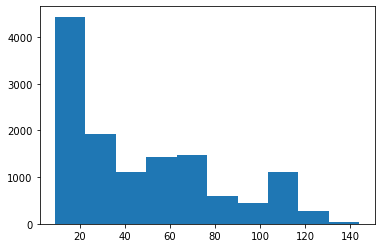

In [30]:
plt.hist(data2['Price'])

In [ ]:
#Histogram shows data is positively skwed.Not normally distributed.

Text(0.5, 1.0, 'Europe Brent Spot Price FOB (Dollars per Barrel)')

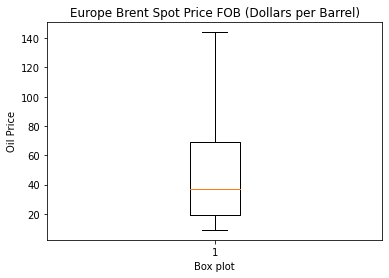

In [31]:
#Boxplot
#help(plt.boxplot)
plt.boxplot(data2['Price'],vert = True)
plt.ylabel('Oil Price')
plt.xlabel('Box plot')
plt.title('Europe Brent Spot Price FOB (Dollars per Barrel)')
#No Outlier found

<AxesSubplot:xlabel='Price'>

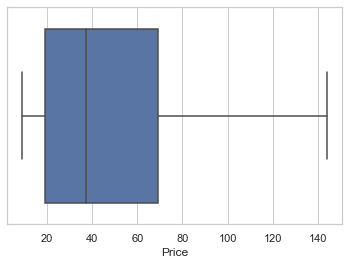

In [32]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=data2["Price"])

In [ ]:
# No Outlier found.Data is positively skwed

<AxesSubplot:xlabel='Year'>

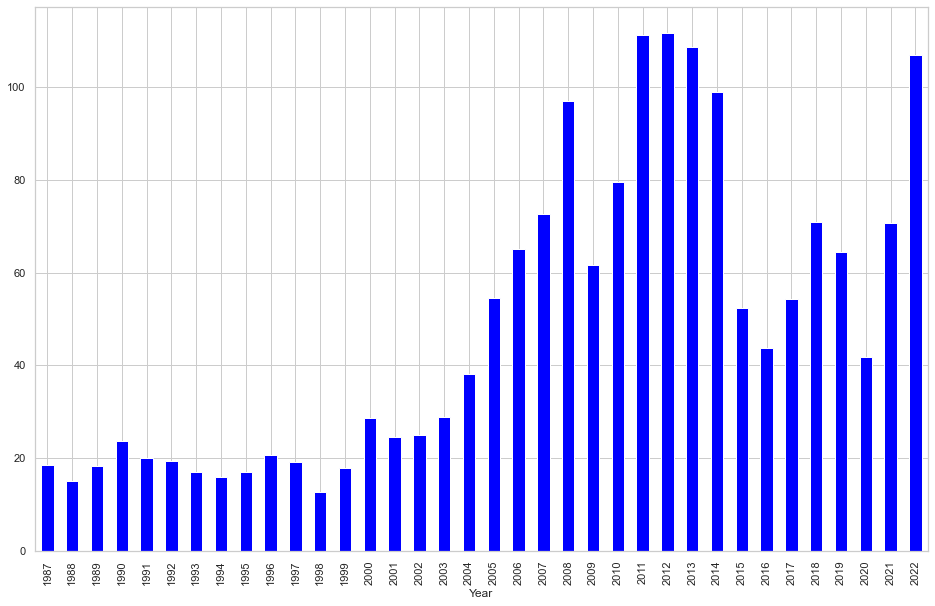

In [33]:
plt.figure(figsize=(16, 10))
data2.groupby('Year')['Price'].mean().plot(kind='bar',color='Blue')

Bar graph shows initially oil price were low from 1987 till 2004.
It also shows, Oil prices was high from 2011 to 2013. After that dropping till 2021. From 2015 onwards, the prices seem to fluctuate with some peaks and falls but is showing a growing trend from 2020 upto present.

In [34]:
corrs=data2.corr()
corrs

Price      Year     Month      Week
Price  1.000000  0.711887 -0.009839 -0.012098
Year   0.711887  1.000000 -0.041254 -0.041036
Month -0.009839 -0.041254  1.000000  0.970501
Week  -0.012098 -0.041036  0.970501  1.000000

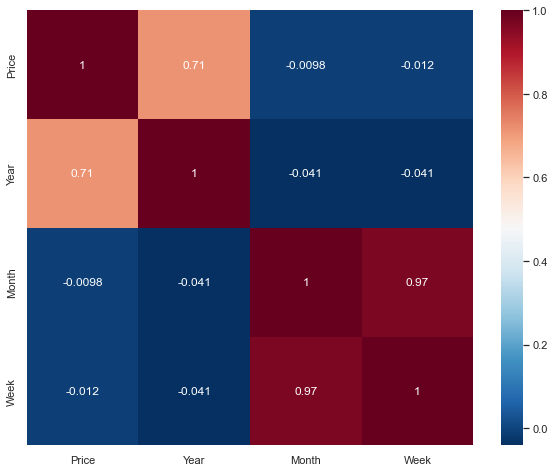

In [35]:
#heatmap of correlation
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Year'>

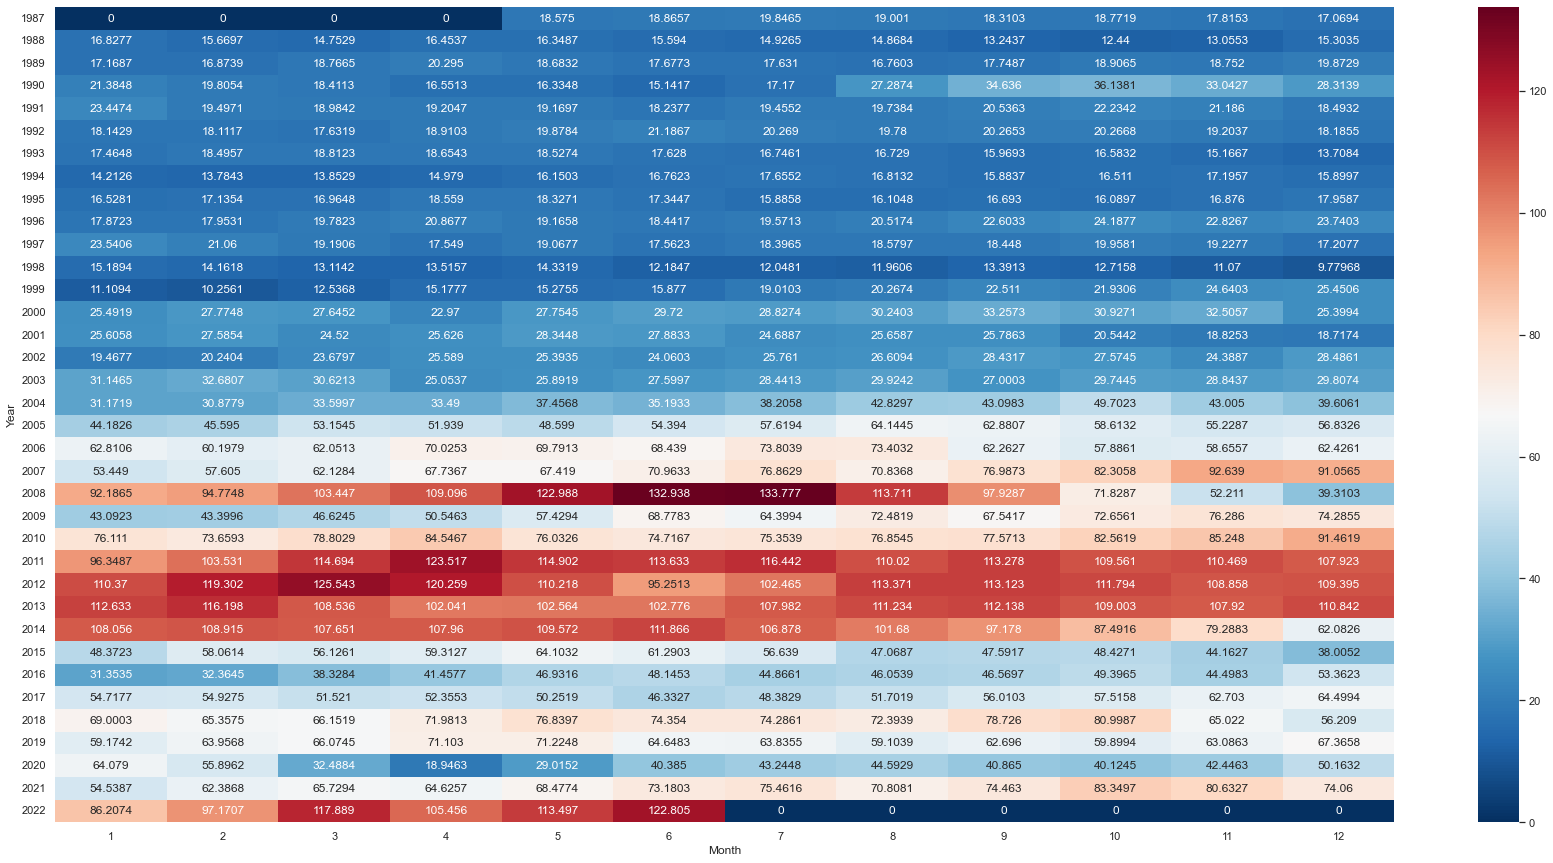

In [36]:
plt.figure(figsize=(30,15))
heatmap_y_month = pd.pivot_table(data=data2,values="Price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,cmap='RdBu_r', annot=True,fmt='g') 

C:\Users\Anuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

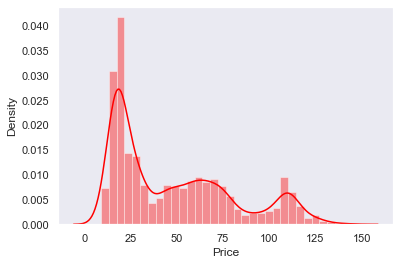

In [37]:
#Distribution Plot
sns.set(style='dark',)
sns.distplot(data2["Price"],color='red')

# ACF AND PACF Plots

In [38]:
import statsmodels.graphics.tsaplots as tsa_plots
import plotly.graph_objects as go

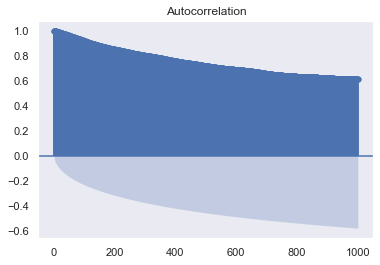

In [39]:
acf_plot = tsa_plots.plot_acf(data2.Price, lags=1000)

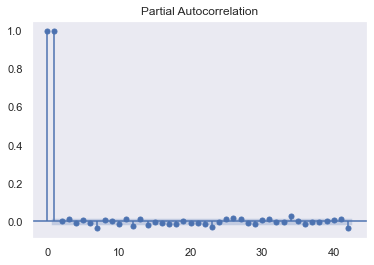

In [40]:
pacf_plot = tsa_plots.plot_pacf(data2.Price,method='ywm')

In [41]:
def create_corr_plot(series, plot_pacf=False):
    corr_array = tsa_plots.pacf(series.dropna(), alpha=0.05) if tsa_plots.plot_pacf else tsa_plots.acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

In [42]:
a=create_corr_plot(data2.Price,plot_pacf=True)

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [43]:
#Jarque Bera Stastical Test for Normality
from scipy.stats import jarque_bera as jb
norm_check=jb(data2["Price"])[1]
print(f"p value:{norm_check.round(4)}", ", Series is Normal" if norm_check >0.05 else ", Series is not Normal")

p value:0.0 , Series is not Normal


array([<AxesSubplot:>], dtype=object)

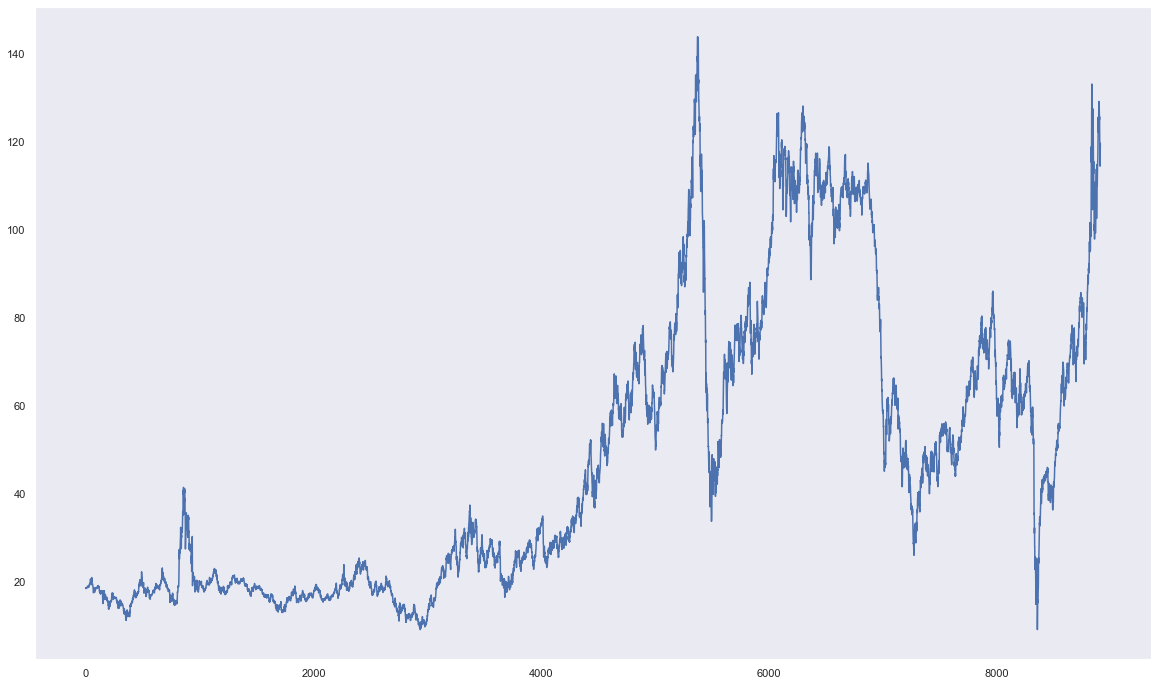

In [44]:
data.Price.plot(subplots=True, figsize=(20,12))

In [45]:
# Parse strings to datetime type
data2_backup['Date'] = pd.to_datetime(data2_backup['Date'], infer_datetime_format=True)
indexedDataset = data2_backup.set_index(['Date'])

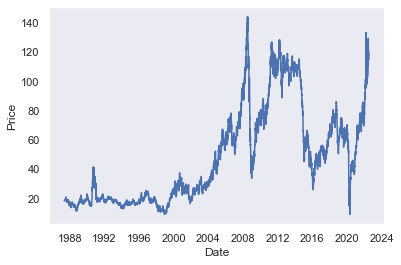

In [46]:
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(indexedDataset)

In [ ]:
#This time series is not stationary and will require differencing to make it stationary.
#For this we will perform following operations like rolling stastics,Dickey-Fuller test,moving average

In [47]:
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

                 Price
Date                  
1987-05-20         NaN
1987-05-21         NaN
1987-05-22         NaN
1987-05-23         NaN
1987-05-24         NaN
...                ...
2022-06-23  121.508333
2022-06-24  120.668333
2022-06-25  119.745000
2022-06-26  118.940000
2022-06-27  118.500833

[12823 rows x 1 columns]                Price
Date                
1987-05-20       NaN
1987-05-21       NaN
1987-05-22       NaN
1987-05-23       NaN
1987-05-24       NaN
...              ...
2022-06-23  4.897366
2022-06-24  4.645457
2022-06-25  4.019257
2022-06-26  3.339638
2022-06-27  2.774768

[12823 rows x 1 columns]


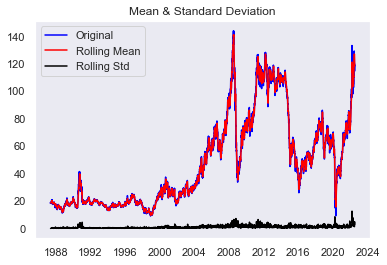

In [48]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Mean & Standard Deviation')
plt.show(block=False)

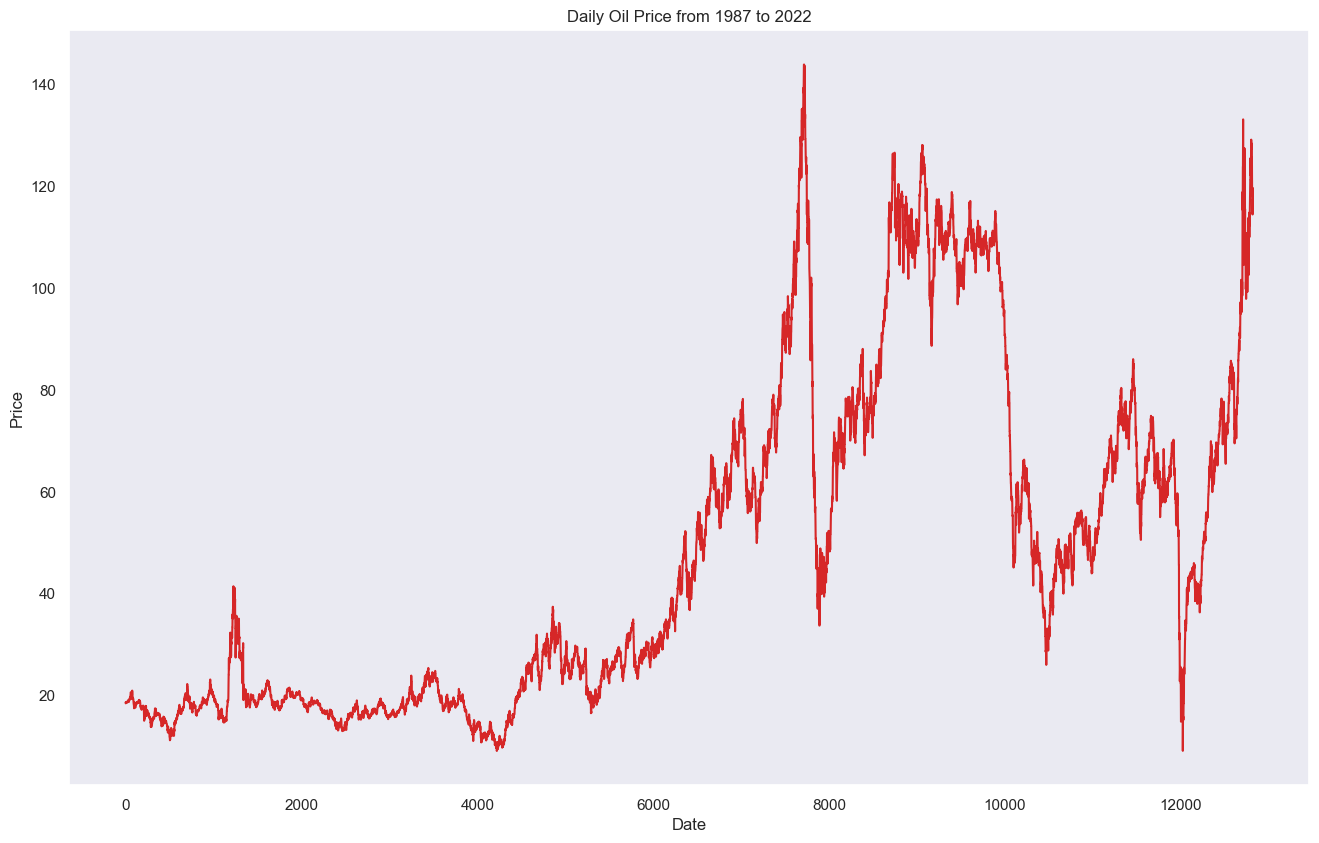

In [49]:
# Plot the daily Cost change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(data2.index,data2.Price, color='tab:red')
plt.gca().set(title="Daily Oil Price from 1987 to 2022", xlabel='Date', ylabel="Price")
plt.show()

<AxesSubplot:>

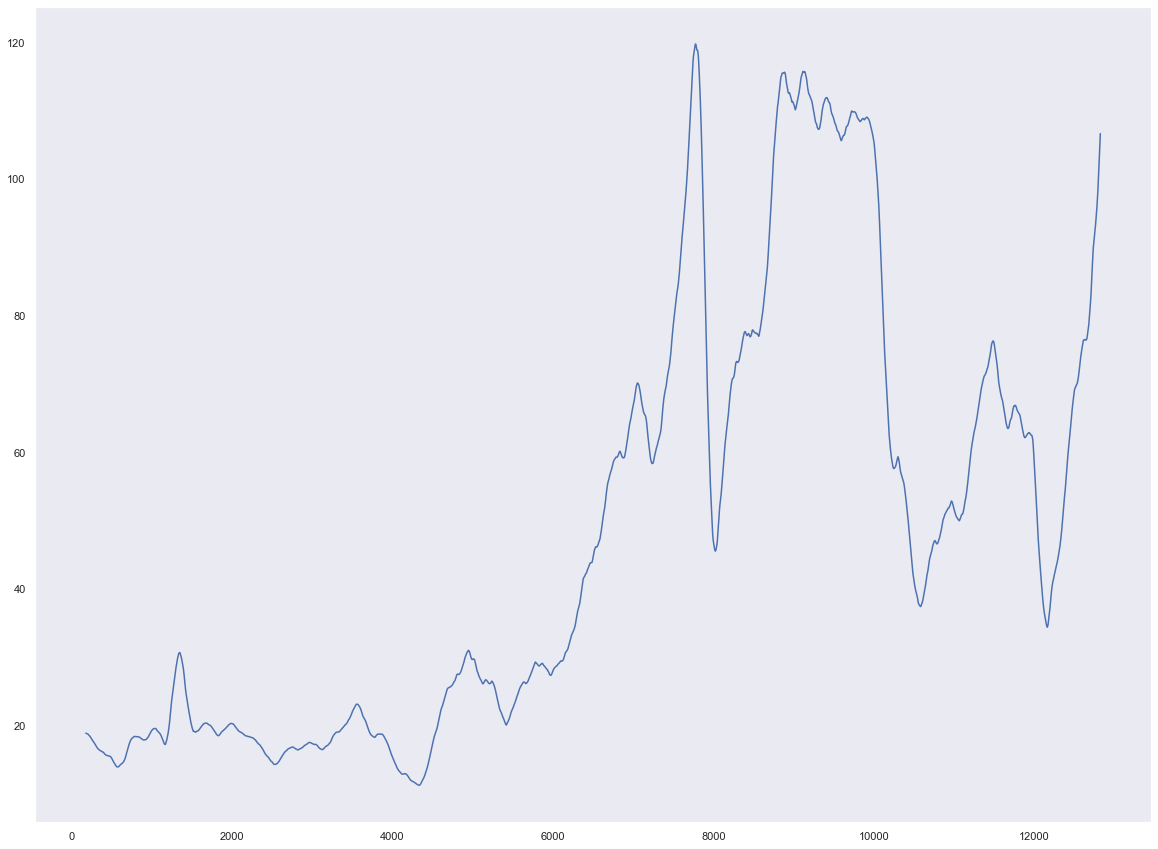

In [50]:
# Apply the Moving Average function by a subset of size 30 days.
data_mean = data2.Price.rolling(window=180).mean()
data_mean.plot(figsize=(20,15))

In [ ]:
### Checking the Stationarity of the Series using ADFuller test and KPSS Test

#### Augmented Dickey-Fuller Test (ADFuller Test)
ADF test is conducted with the following assumptions :

1. Null Hypothesis (HO): Series is non-stationary.
2. Alternate Hypothesis(HA): Series is stationary.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(HO):
If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [51]:
#Augmented Dickey-Fuller Test (ADFuller Test)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=365).mean()
    rolstd = pd.Series(timeseries).rolling(window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

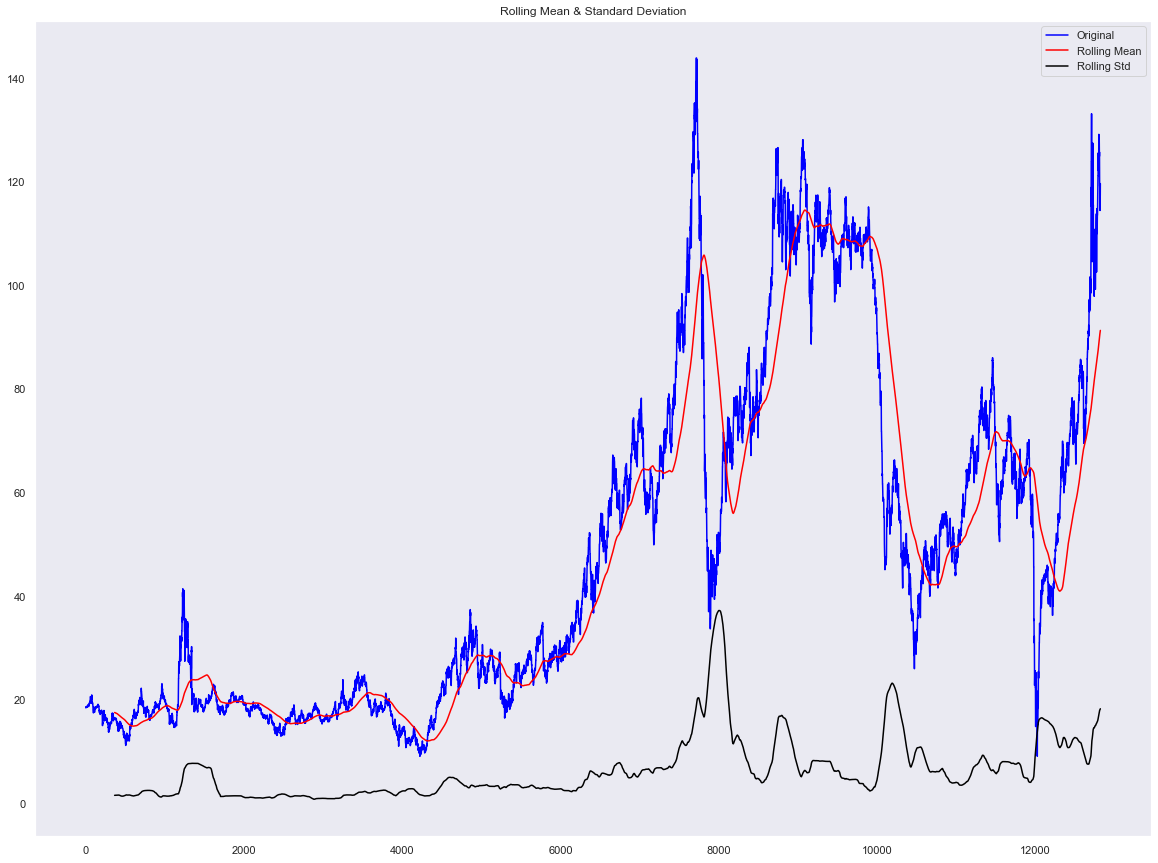

Results of Dickey-Fuller Test:
Test Statistic                    -1.565654
p-value                            0.500820
#Lags Used                        41.000000
Number of Observations Used    12781.000000
Critical Value (1%)               -3.430862
Critical Value (5%)               -2.861766
Critical Value (10%)              -2.566890
dtype: float64


In [52]:
plt.figure(figsize=(20,15))
test_stationarity(data2["Price"])

The p-value obtained is greater than significance level of 0.05 and the ADF test statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

# Making the Series Stationary

1. Seasonal Decompose

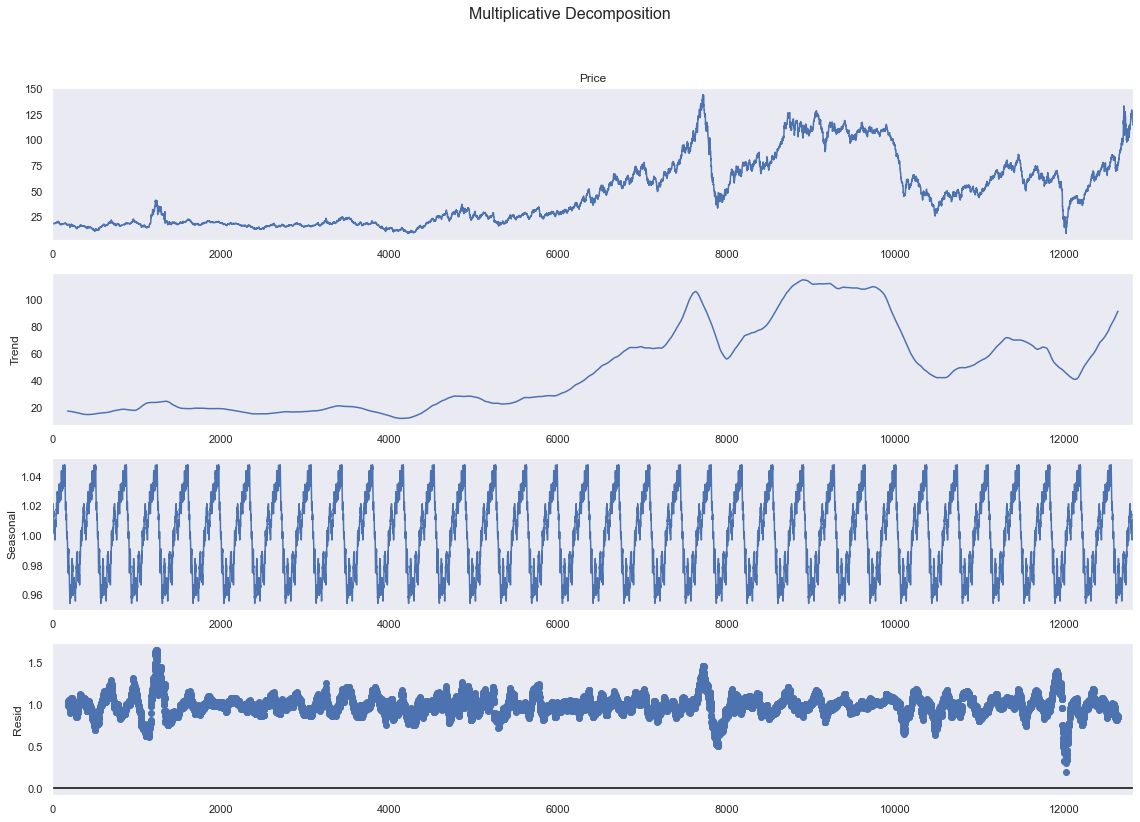

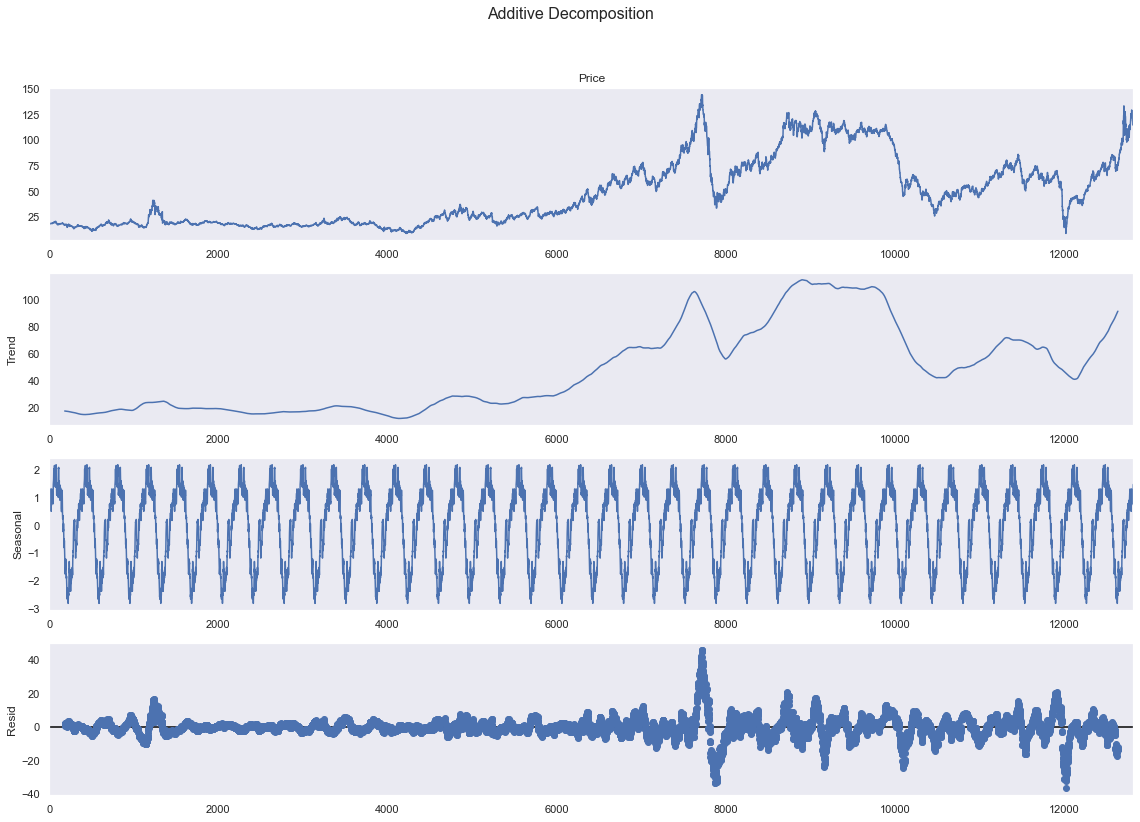

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data2["Price"], model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data2["Price"], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()